In [6]:
from pycocotools.coco import COCO
import numpy as np
import os.path
from typing import Any, Callable, List, Optional, Tuple
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, json, cv2, numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential

from keras.layers import (
    Flatten,
    Dense,
    Dropout,
    Conv2D,
    LeakyReLU,
    BatchNormalization,
    MaxPool2D,
)

In [7]:
img_dir=(u'C:\\Users\\Administrator\\Downloads\\aspine202030604\\images')
annotations_file=(u'C:\\Users\\Administrator\\Downloads\\aspine202030604\\annotations\\person_keypoints_Validation.json')

In [8]:
coco=COCO(annotations_file)
imgIds = coco.getImgIds()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [48]:
#validation set details
imgIds = coco.getImgIds()
print("Total images: {}".format(len(imgIds)))
rand=np.random.randint(0,len(imgIds))
img = coco.loadImgs(imgIds[rand])[0]
print("Image example:")
print(img)
annIds=coco.getAnnIds()
print("\nTotal annotations: {}".format(len(annIds)))
ann=coco.loadAnns(coco.getAnnIds(imgIds=img['id']))
print("Annotation example:")
print(ann)

keypoints_original = [[list(a) for a in zip(*[iter(ann[0]['keypoints'])]*3)]]

def CoupeToInt(coupe: List[float]) -> List[int]:
    return list(map(int, coupe))

converted_keypoints = [ CoupeToInt(el[0:2]) for kp in keypoints_original for el in kp ]


keypoints_original

Total images: 30
Image example:
{'id': 30, 'width': 1184, 'height': 2112, 'file_name': 'img-00148-00001.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}

Total annotations: 30
Annotation example:
[{'id': 30, 'image_id': 30, 'category_id': 1, 'segmentation': [], 'area': 473951.5277, 'bbox': [178.63, 1489.46, 813.19, 582.83], 'iscrowd': 0, 'attributes': {'occluded': False}, 'keypoints': [354.56, 1524.83, 2, 779.53, 1506.34, 2, 178.63, 1670.3, 2, 991.82, 1667.37, 2, 458.9, 1658.53, 2, 713.26, 1642.34, 2, 399.34, 1590.68, 2, 747.7, 1580.47, 2, 584.85, 1632.49, 2, 342.84, 1865.52, 2, 857.93, 1854.4, 2, 378.76, 2072.29, 2, 821.98, 2044.75, 2, 514.38, 1496.64, 2, 614.94, 1489.46, 2, 575.69, 1518.83, 2], 'num_keypoints': 16}]


[[[354.56, 1524.83, 2],
  [779.53, 1506.34, 2],
  [178.63, 1670.3, 2],
  [991.82, 1667.37, 2],
  [458.9, 1658.53, 2],
  [713.26, 1642.34, 2],
  [399.34, 1590.68, 2],
  [747.7, 1580.47, 2],
  [584.85, 1632.49, 2],
  [342.84, 1865.52, 2],
  [857.93, 1854.4, 2],
  [378.76, 2072.29, 2],
  [821.98, 2044.75, 2],
  [514.38, 1496.64, 2],
  [614.94, 1489.46, 2],
  [575.69, 1518.83, 2]]]

In [10]:
kps_metrix = []
image_list = []

for id in imgIds:
    img = coco.loadImgs(id)[0]
    imgPath = os.path.join(img_dir,img['file_name'])
    image_list.append(Image.open(imgPath))

    # load annotations
    ann=coco.loadAnns(coco.getAnnIds(imgIds=img['id']))
    keypoints_original = [[list(a) for a in zip(*[iter(ann[0]['keypoints'])]*3)]]
    kps_row = []
    for kp in keypoints_original:
        for el in kp:
            kps_row.extend(el[0:2])

    kps_metrix.append(kps_row)

df = pd.DataFrame(kps_metrix)

image_array_list = [np.array(img) for img in image_list]
df['image'] = image_array_list

df.head

<bound method NDFrame.head of          0        1       2        3       4        5        6        7  \
0   361.78  1508.22  855.48  1513.03  229.28  1625.60   929.77  1609.73   
1   353.52  1464.04  891.57  1475.27  238.98  1665.68  1000.97  1689.26   
2   311.61  1513.71  830.75  1501.62  207.03  1665.75   940.89  1665.91   
3   362.08  1515.50  795.72  1529.08  225.00  1649.69   902.30  1627.58   
4   334.41  1540.74  857.87  1535.83  201.19  1662.91   978.03  1674.63   
5   358.77  1478.21  871.01  1483.13  239.46  1598.82   946.76  1596.72   
6   360.16  1469.76  869.19  1529.80  266.26  1678.72   974.44  1688.07   
7   342.45  1432.92  822.19  1435.99  233.04  1523.33   926.29  1540.03   
8   372.87  1529.32  821.14  1529.25  212.27  1660.04   938.26  1656.79   
9   353.59  1517.74  816.92  1477.06  225.31  1636.29   940.45  1595.84   
10  353.06  1462.80  826.77  1452.20  272.50  1530.93   934.91  1550.15   
11  320.70  1492.92  833.89  1502.93  223.84  1631.62   941.77  1652.3

In [45]:
#df.to_csv('out\df.csv')

In [76]:
keypoints_classes_ids2names = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10', 10: '11', 11: '12', 12: '13', 13: '14', 14: '15', 15: '16'}

def CoupeToInt(coupe: List[float]) -> List[int]:
    return list(map(int, coupe))

def visualize(array, keypoints):

    # image = Image.fromarray(array)

    open_cv_image = np.array(array)
    image = open_cv_image[:, :, ::-1].copy()
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    converted_keypoints = [CoupeToInt(list(a)) for a in zip(*[iter(keypoints)]*2)]

    for idx, kp in enumerate(converted_keypoints):
        image = cv2.putText(image.copy(), "" + keypoints_classes_ids2names[idx], tuple(kp), cv2.FONT_HERSHEY_PLAIN, 2, (32,253,0), 3, cv2.LINE_AA)
        image = cv2.circle(image.copy(), tuple(kp), 5, (255,0,0), 10)

    plt.figure(figsize=(25,25))
    plt.imshow(image)
    plt.show()


In [54]:
rand_number = np.random.randint(0,len(imgIds))
simple_row = df.iloc[rand_number]

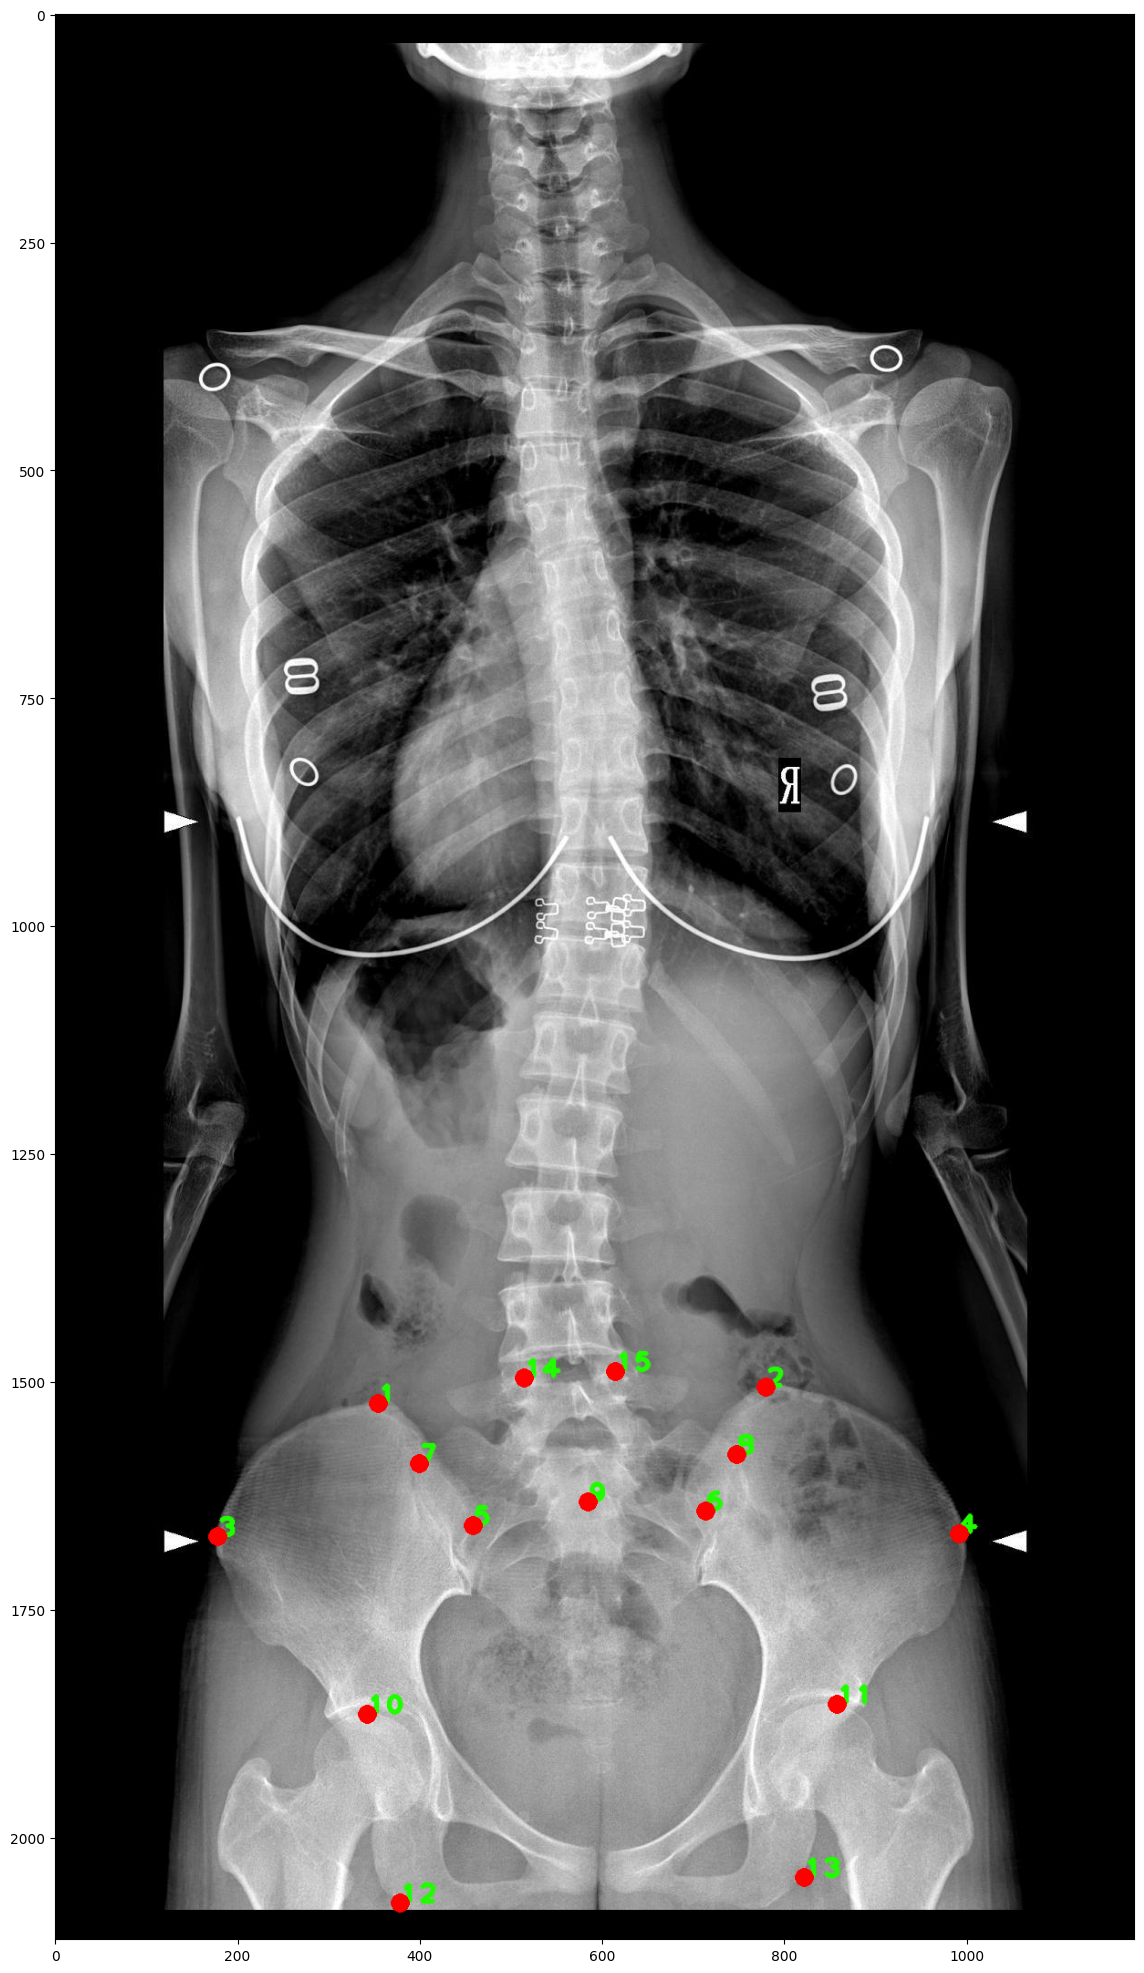

In [77]:
# keypoints_original = [[list(a) for a in zip(*[iter(ann[0]['keypoints'])]*3)]]
#
# def CoupeToInt(coupe: List[float]) -> List[int]:
#     return list(map(int, coupe))
#
# converted_keypoints = [ CoupeToInt(el[0:2]) for kp in keypoints_original for el in kp ]
# imgPath = os.path.join(img_dir,img['file_name'])
image = simple_row['image']
annotations = simple_row[:31]
visualize(image, simple_row[:31])

pandas.core.series.Series

In [66]:
# Building a CNN model using Sequential API
model = Sequential([
    Conv2D(8, (5, 5), padding='same', use_bias=False, input_shape=(2112, 1184, 3)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(16, (4, 4), padding='same', use_bias=False),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), padding='same', use_bias=False),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(64, (2, 2), padding='same', use_bias=False),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(32)
])

In [67]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 2112, 1184, 8)     600       
                                                                 
 leaky_re_lu_23 (LeakyReLU)  (None, 2112, 1184, 8)     0         
                                                                 
 batch_normalization_23 (Ba  (None, 2112, 1184, 8)     32        
 tchNormalization)                                               
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 1056, 592, 8)      0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 1056, 592, 16)     2048      
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 1056, 592, 16)    

In [68]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [69]:
# initializing few hyper parameters
epochs = 200
batch_size = 64
validation_split = 0.2

In [70]:
y_train=df.loc[:, df.columns != 'image']

In [71]:
x_train=np.stack(df['image'])

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = validation_split)

Epoch 1/200
